## TRABAJO FINAL MODELOS Y APRENDIZAJES 

GRACE PROAÑO

In [27]:
# LIBRERIAS

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

Los dataset se encuentran en .data y .names , los mismos sera leidos como si fuesen un csv y transformados en dataframe

In [12]:
# Leer archivo .data 
data = pd.read_csv('wdbc.data')
print(data)


       842302  M  17.99  10.38   122.8    1001   0.1184   0.2776   0.3001  \
0      842517  M  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.08690   
1    84300903  M  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.19740   
2    84348301  M  11.42  20.38   77.58   386.1  0.14250  0.28390  0.24140   
3    84358402  M  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.19800   
4      843786  M  12.45  15.70   82.57   477.1  0.12780  0.17000  0.15780   
..        ... ..    ...    ...     ...     ...      ...      ...      ...   
563    926424  M  21.56  22.39  142.00  1479.0  0.11100  0.11590  0.24390   
564    926682  M  20.13  28.25  131.20  1261.0  0.09780  0.10340  0.14400   
565    926954  M  16.60  28.08  108.30   858.1  0.08455  0.10230  0.09251   
566    927241  M  20.60  29.33  140.10  1265.0  0.11780  0.27700  0.35140   
567     92751  B   7.76  24.54   47.92   181.0  0.05263  0.04362  0.00000   

      0.1471  ...   25.38  17.33   184.6    2019   0.1622   0.6656  0.7119 

In [5]:
data

,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
564,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
565,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
566,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Como se puede visualizar no hay ninguna etiqueta, por ende se revisa que en el dataset.names debe estar la etiqueta , se realiza una lectura con las etiquetas del segundo dataset 

In [3]:

data1 = 'C:\\Users\\gadri\\Documents\\breast+cancer+wisconsin+diagnostic (1)\\wdbc.data'
# Definir los nombres de las columnas
columna = ['ID', 'Diagnosis'] + [f'Feature_{i}' for i in range(1, 31)]
df = pd.read_csv(data1, header=None, names=columna)
print(df.head())

         ID Diagnosis  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
0    842302         M      17.99      10.38     122.80     1001.0    0.11840   
1    842517         M      20.57      17.77     132.90     1326.0    0.08474   
2  84300903         M      19.69      21.25     130.00     1203.0    0.10960   
3  84348301         M      11.42      20.38      77.58      386.1    0.14250   
4  84358402         M      20.29      14.34     135.10     1297.0    0.10030   

   Feature_6  Feature_7  Feature_8  ...  Feature_21  Feature_22  Feature_23  \
0    0.27760     0.3001    0.14710  ...       25.38       17.33      184.60   
1    0.07864     0.0869    0.07017  ...       24.99       23.41      158.80   
2    0.15990     0.1974    0.12790  ...       23.57       25.53      152.50   
3    0.28390     0.2414    0.10520  ...       14.91       26.50       98.87   
4    0.13280     0.1980    0.10430  ...       22.54       16.67      152.20   

   Feature_24  Feature_25  Feature_26  Featu

In [16]:
# Revisamos los datos para limpiarlos , sin embargo en este dataset se verifica que no existe valores nan
nan_por_columna = df.isna().sum()
print("\nNaN por columna:\n", nan_por_columna) 


NaN por columna:
 ID            0
Diagnosis     0
Feature_1     0
Feature_2     0
Feature_3     0
Feature_4     0
Feature_5     0
Feature_6     0
Feature_7     0
Feature_8     0
Feature_9     0
Feature_10    0
Feature_11    0
Feature_12    0
Feature_13    0
Feature_14    0
Feature_15    0
Feature_16    0
Feature_17    0
Feature_18    0
Feature_19    0
Feature_20    0
Feature_21    0
Feature_22    0
Feature_23    0
Feature_24    0
Feature_25    0
Feature_26    0
Feature_27    0
Feature_28    0
Feature_29    0
Feature_30    0
dtype: int64


In [17]:
df

,ID,Diagnosis,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,...,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


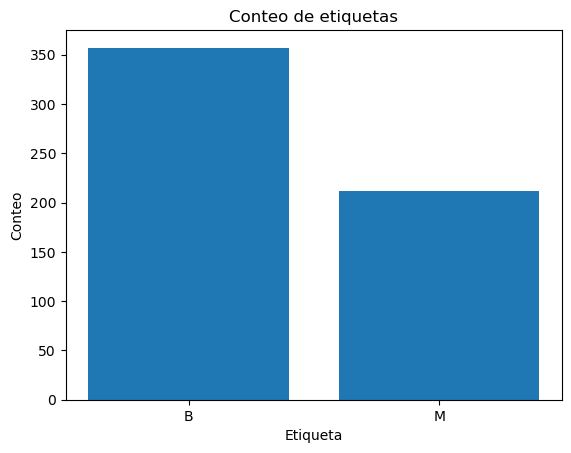

In [20]:
etiquetas = df['Diagnosis'].value_counts()
# Crear una gráfica de barras
plt.bar(etiquetas.index, etiquetas)
plt.xlabel('Etiqueta')
plt.ylabel('Conteo')
plt.title('Conteo de etiquetas')
plt.show()

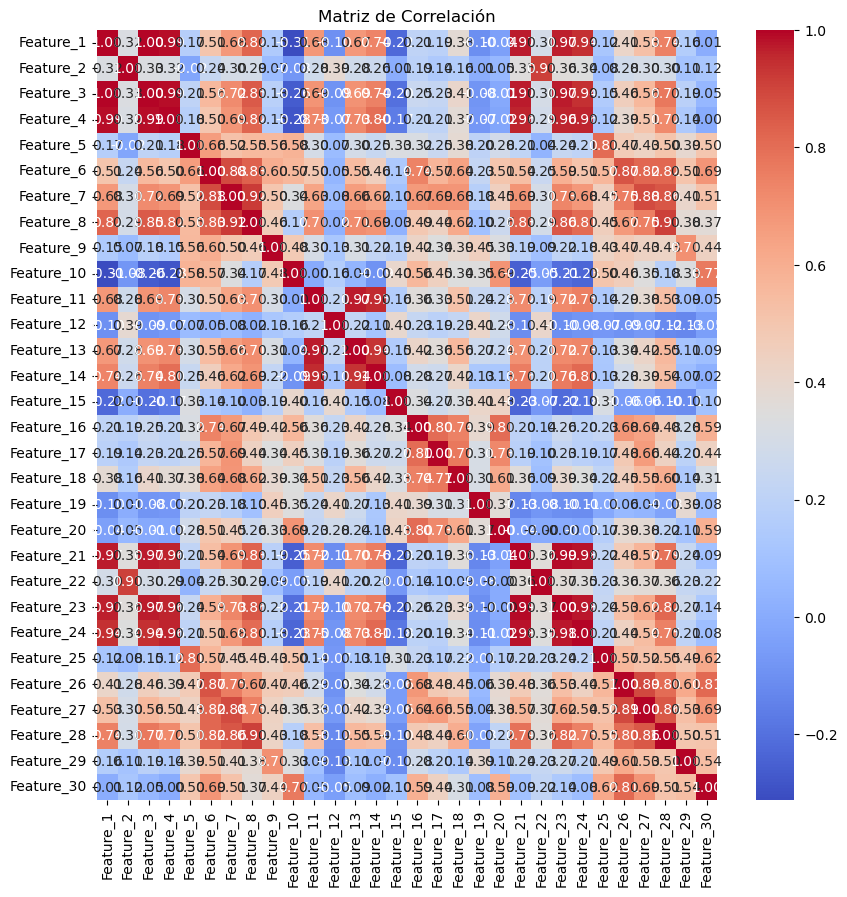

In [4]:
# Calcular la matriz de correlación para validar si existe  relacion entre variables y asegurarnos si es necesario aplicar PCA
features = df.iloc[:, 2:]
corr_matriz = features.corr()
corr_matriz
plt.figure(figsize=(10, 10))  # Tamaño de la figura
sns.heatmap(corr_matriz, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

Conclusion 1: Al realizar las matriz de correlacion se puede observar que los colores mas calidos nos inidcan una correlacion entre variables ,en este caso si se observa en los colores como el rojo y azul fuerte existe una relacion entre variables , por lo tanto si se puede aplicar PCA  que nos permitira simplificar datos antes de proceder a probar los modelos de aprendizaje

In [8]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
pca = PCA(n_components=0.95)
features_pca = pca.fit_transform(features_scaled)
pca_columns = [f'PC{i+1}' for i in range(pca.n_components_)]
nuevo_df = pd.DataFrame(data=features_pca, columns=pca_columns)
nuevo_df


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877402
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240988,-0.711905,1.106995
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097374,0.024066,0.454275
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059565,-1.405440,-1.116975
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263805,0.377704
...,...,...,...,...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,-0.074824,-2.375193,-0.596130,-0.035471,0.987929,0.256989
565,3.793382,-3.584048,2.088476,-2.506028,-0.510723,-0.246710,-0.716326,-1.113360,-0.105207,-0.108632
566,1.256179,-1.902297,0.562731,-2.089227,1.809991,-0.534447,-0.192758,0.341887,0.393917,0.520877
567,10.374794,1.672010,-1.877029,-2.356031,-0.033742,0.567936,0.223082,-0.280239,-0.542035,-0.089296


## Entrenamiento  y validacion

In [20]:
target = df['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(nuevo_df, target, test_size=0.2, random_state=42)
print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_val:", X_test.shape)
print("Tamaño de y_train:", y_train.shape)
print("Tamaño de y_val:", y_test.shape)

Tamaño de X_train: (455, 10)
Tamaño de X_val: (114, 10)
Tamaño de y_train: (455,)
Tamaño de y_val: (114,)


In [24]:
#vamos a entreanr con un clasificador de regresion logisticas
clf = LogisticRegression(random_state=42,dual=False, max_iter=100,verbose=0) #variación de hiperparametros
clf.fit(X_train, y_train)

#realizamos las predicciones al conjunto de test
y_pred = clf.predict(X_test)
#veriicamos la precision del modelo en base a la métrica de la accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo con Regresión Logística: {accuracy * 100:.2f}%')

Precisión del modelo con Regresión Logística: 98.25%


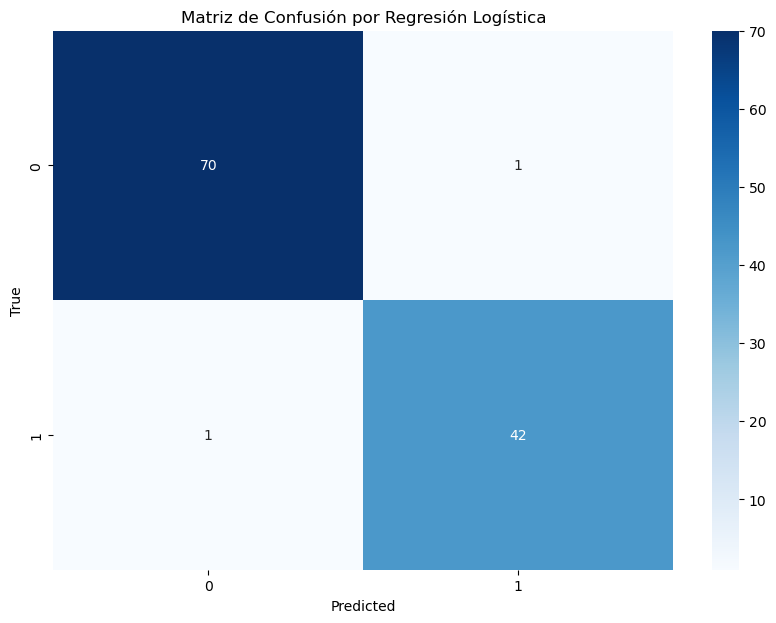

In [25]:
cm = confusion_matrix(y_test, y_pred)
#graficamos la matriz de confusión
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusión por Regresión Logística')
plt.show()

In [30]:
# Preparar el clasificador con algunos hiperparámetros que no cambiarán
clf = LogisticRegression(random_state=42)
param_grid = { 'penalty': ['l1', 'l2', 'elasticnet', 'none'],'C': [0.01, 0.1, 1, 10, 100],'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'max_iter': [100, 200, 500],}
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)
y_pred_optimized = grid_search.predict(X_test)
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
print(f'Precisión del modelo optimizado con Regresión Logística: {accuracy_optimized * 100:.2f}%')

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


C:\Users\gadri\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\gadri\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\gadri\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\gadri\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\gadri\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the

Precisión del modelo optimizado con Regresión Logística: 99.12%


C:\Users\gadri\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\gadri\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\gadri\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\gadri\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\gadri\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
675 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If the

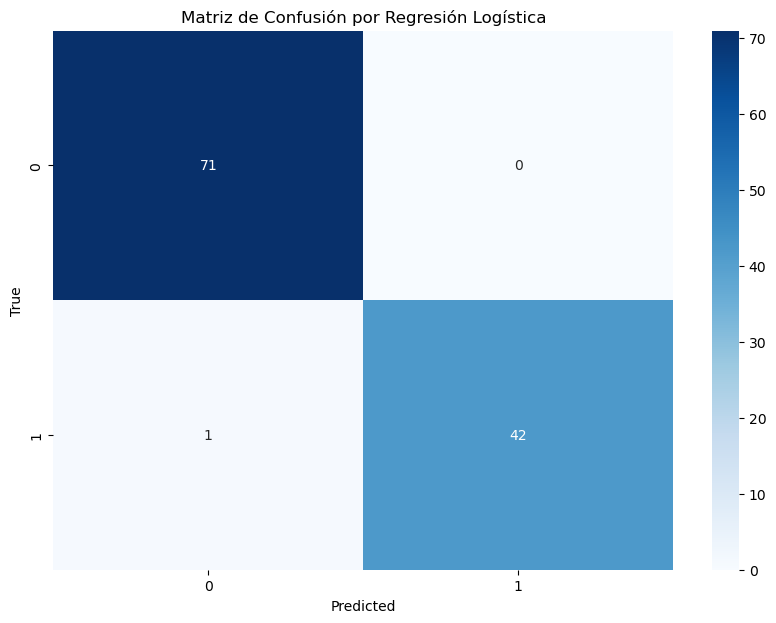

In [29]:
cm = confusion_matrix(y_test, y_pred_optimized)
#graficamos la matriz de confusión
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusión por Regresión Logística')
plt.show()

Conclusion 2: Se ha aplicado el modelo de regresion logistica, para lo cual hemos observado la precision del modelo en un 98.25 sin embargo se ha usado una busqueda en grilla que utiliza  validación cruzada para evaluar el rendimiento de cada combinación de hiperparámetros. Una vez completada la búsqueda, se identifica la mejor combinación de hiperparámetros y se utiliza para hacer predicciones sobre el conjunto de prueba, evaluando la precisión del modelo optimizado.


In [34]:
#vamos a entreanr con un clasificador de regresion logisticas
clf = KNeighborsClassifier(n_neighbors=5, weights='distance')
clf.fit(X_train, y_train)

#realizamos las predicciones al conjunto de test
y_pred = clf.predict(X_test)
#veriicamos la precision del modelo en base a la métrica de la accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo KNN: {accuracy * 100:.2f}%')

Precisión del modelo KNN: 95.61%


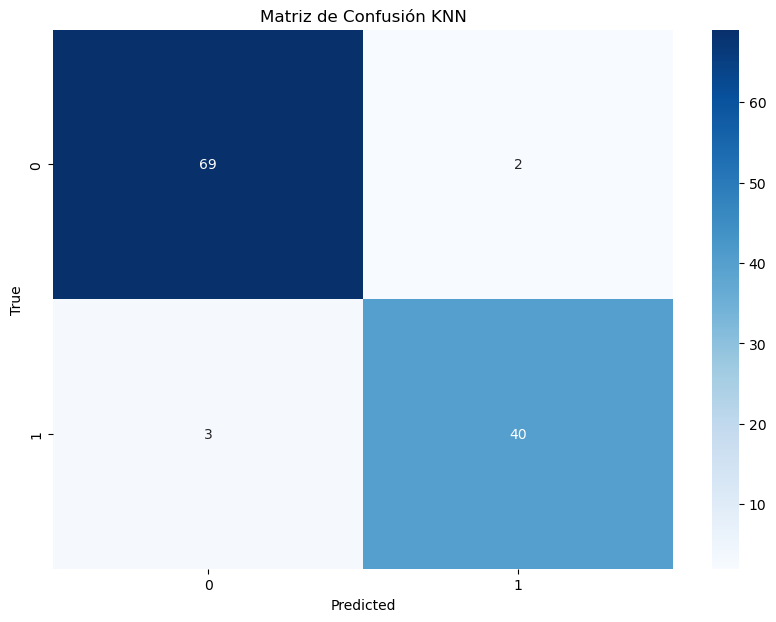

In [32]:
cm = confusion_matrix(y_test, y_pred)
#graficamos la matriz de confusión
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusión KNN')
plt.show()

In [39]:
# Configurar y entrenar el modelo SVM
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)

# Realizar predicciones sobre el conjunto de prueba
y_pred = svm_model.predict(X_test)

# Calcular y mostrar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo SVM: {accuracy * 100:.2f}%')

Precisión del modelo SVM: 98.25%


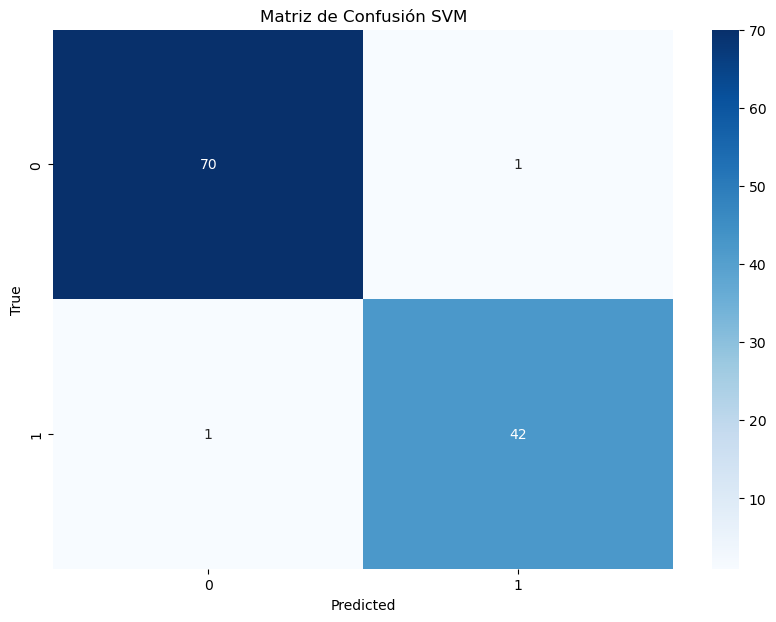

In [37]:
cm = confusion_matrix(y_test, y_pred)
#graficamos la matriz de confusión
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusión SVM')
plt.show()